# Machine Learning & Energy WS 20/21
# Exercise 7 - Part I: Normal Distribution
This exercise has two parts.

In this first part of the exercise we will look at the most important continuous probability distribution, the normal distribution.

In [11]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn
import normal

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. The univariate normal distribution
#### a) Complete the code for the function ``pdf()`` in the module ``normal`` which computes the probability density function (PDF) for a univaraite normal distribution.
Run the cell below to check your implementation.

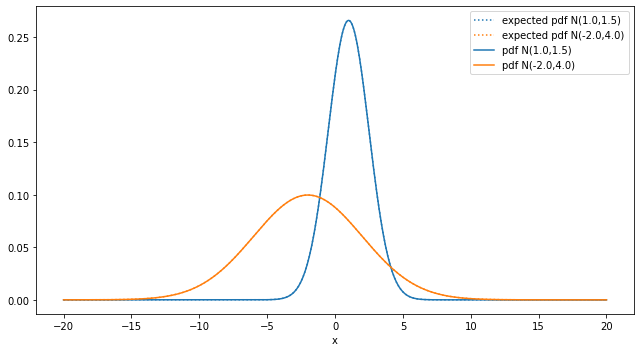

In [12]:
plt.figure(figsize=(9,5))
xx = np.linspace(-20,20,500)
mu1, sigma1 = 1.0, 1.5
mu2, sigma2 = -2.0, 4.0
plt.plot(xx, norm.pdf(xx, loc=mu1, scale=sigma1), color="tab:blue", linestyle=":", label=f"expected pdf N({mu1},{sigma1})")
plt.plot(xx, norm.pdf(xx, loc=mu2, scale=sigma2), color="tab:orange", linestyle=":", label=f"expected pdf N({mu2},{sigma2})")
plt.plot(xx, normal.pdf(xx, mu=mu1, sigma=sigma1), color="tab:blue", label=f"pdf N({mu1},{sigma1})")
plt.plot(xx, normal.pdf(xx, mu=mu2, sigma=sigma2), color="tab:orange", label=f"pdf N({mu2},{sigma2})")
plt.xlabel("x")
plt.legend()
plt.tight_layout()

The cumulative distribution function (CDF) is the integral of the PDF, i.e. $F(x) = \int_a^b f(x)dx$, and hence gives the probabilty $P(a<X \leq b) = F(b)-F(a)$ for the random variable $X$.
#### b) Complete the code for the function ``cdf()`` in the module ``normal``.
The function computes CDF of the univariate normal distribution.
The function is given by
$$F(x) = \frac{1}{2}[1+erf(\frac{x-\mu}{\sigma\sqrt{2}})].$$

NOTE: The $erf$ function can be computed using ``special.erf()`` from scipy.

Run the cell below to check your implemenatation.

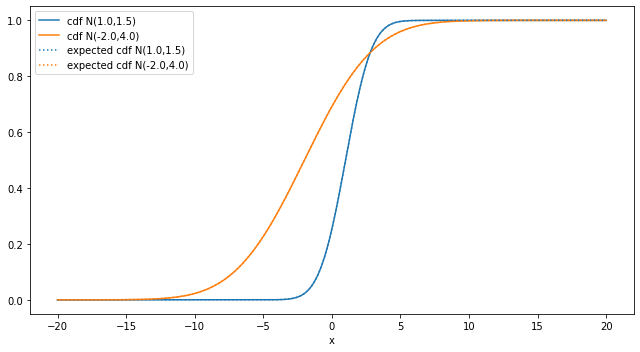

In [13]:
plt.figure(figsize=(9,5))
xx = np.linspace(-20,20,500)
mu1, sigma1 = 1.0, 1.5
mu2, sigma2 = -2.0, 4.0
plt.plot(xx, normal.cdf(xx, mu=mu1, sigma=sigma1), color="tab:blue", label=f"cdf N({mu1},{sigma1})")
plt.plot(xx, normal.cdf(xx, mu=mu2, sigma=sigma2), color="tab:orange", label=f"cdf N({mu2},{sigma2})")
plt.plot(xx, norm.cdf(xx, loc=mu1, scale=sigma1), color="tab:blue", linestyle=":", label=f"expected cdf N({mu1},{sigma1})")
plt.plot(xx, norm.cdf(xx, loc=mu2, scale=sigma2), color="tab:orange", linestyle=":", label=f"expected cdf N({mu2},{sigma2})")
plt.legend()
plt.xlabel("x")
plt.tight_layout()

#### c) Suppose $X$ is a normally distributed random variable with $\mu=2.0$ and $\sigma=1.0$.
- What is the probability for $X \leq 0.0$? (0.0228)
- What is the probability for $X > 3.0$? (0.1587)
- What is the probabilty for $1.0<X \leq 2.0$? (0.3414)

In [14]:
# add code here
import normal

print(normal.cdf(0,2,1))
print(1-normal.cdf(3,2,1))
print(normal.cdf(2,2,1)-normal.cdf(1,2,1))

0.02275013194817921
0.15865525393145707
0.3413447460685429


#### d) Complete the function ``estimate_mu()`` and ``estimate_sigma()`` in the module ``normal`` which estimate the mean and standard devations from a set of samples.
Run the cell below to check your implementation.

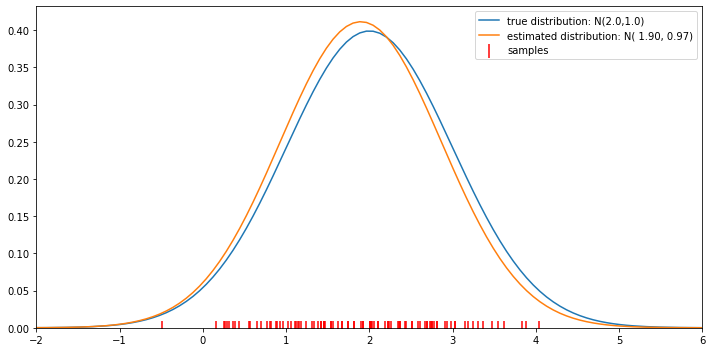

In [15]:
#generate samples from distribution
N = 100
mu = 2.0
sigma = 1.0

# draw samples
x_sampled = normal.sample(mu=mu,sigma=sigma,n_samples=N, random_state=100)

# estimate mu and sigma from samples
mu_hat = normal.estimate_mu(x_sampled)
sigma_hat = normal.estimate_sigma(x_sampled)

# plot
plt.figure(figsize=(10,5))
plt.plot(xx, normal.pdf(xx, mu=2.0, sigma=1), label=f"true distribution: N({mu},{sigma})")
plt.plot(xx, normal.pdf(xx, mu=mu_hat, sigma=sigma_hat), label=f"estimated distribution: N({mu_hat: .2f},{sigma_hat: .2f})")
plt.scatter(x_sampled,np.zeros_like(x_sampled), marker="|", s=200, color="red", label="samples")
plt.xlim((mu-4*sigma,mu+4*sigma))
plt.ylim(bottom=-0.0)
plt.legend()
plt.tight_layout()

expected output:
<br>
<img src="images/estimated_dist.png">

## 2. The multivariate normal distribution

The multivariate Gaussian is the generalization of the univariate Gaussain to higher dimensions. It is defined by a D-dimensional mean vector and a DxD covaraince matrix.
#### a) Run the code below. Test different values for the parameters and oberserve the effect on the plotted distribution.

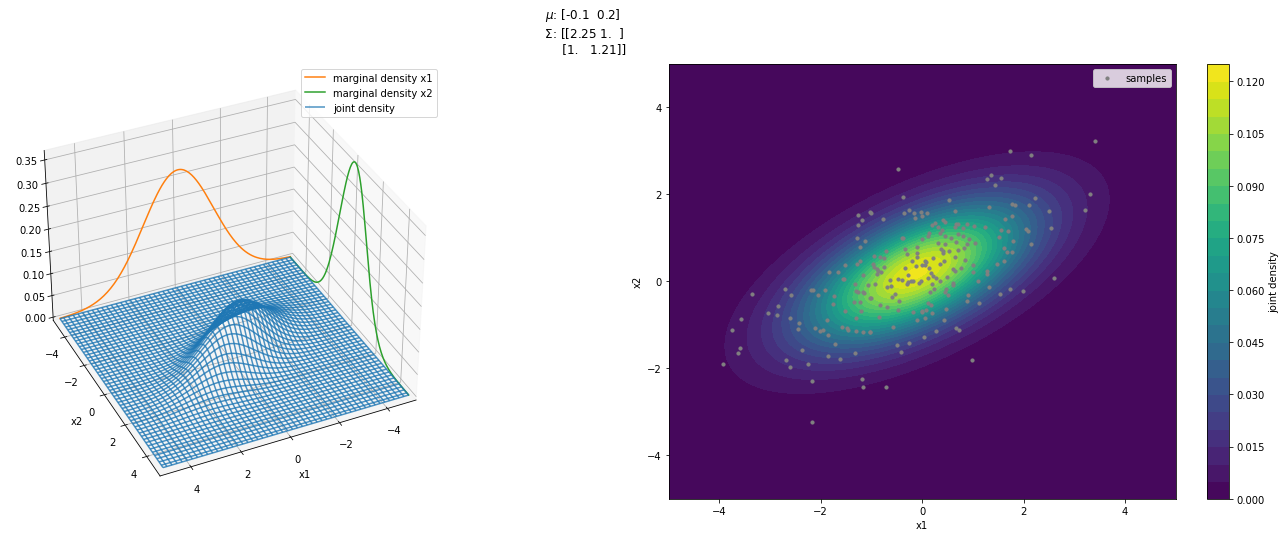

In [16]:
# set parameters
mu_1 = -0.1
mu_2 = 0.2
sigma_1 = 1.5
sigma_2 = 1.1
cov_12 = 1
mu = np.array([mu_1,mu_2])
Sigma = np.array([[sigma_1**2, cov_12],[cov_12, sigma_2**2]])

# plotting
fig = plt.figure(figsize=(25,8))
lb,ub = -5.0,5.0
x_grid = np.linspace(lb,ub,200)
xx_1,xx_2 = np.meshgrid(x_grid, x_grid)
zz_1 = norm.pdf(x_grid, loc=mu_1, scale=sigma_1)
zz_2 = norm.pdf(x_grid, loc=mu_2, scale=sigma_2)
zz_12 = mvn.pdf(np.dstack((xx_1, xx_2)), mean=mu, cov=Sigma)
# plot in 3d
ax1 = fig.add_subplot(1,2,1,projection='3d')
ax1.plot(xs=x_grid, ys=np.ones_like(x_grid)*lb, zs=zz_1, label="marginal density x1", color="tab:orange")
ax1.plot(xs=np.ones_like(x_grid)*lb, ys=x_grid, zs=zz_2, label="marginal density x2", color="tab:green")
ax1.plot_wireframe(xx_1, xx_2, zz_12, alpha=0.8, label="joint density", color="tab:blue")
ax1.view_init(35, 65)
ax1.set_xlim(lb,ub)
ax1.set_ylim(lb,ub)
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.legend()
# plot contour and samples
ax2 = fig.add_subplot(1,2,2)
cntr=ax2.contourf(xx_1, xx_2, zz_12, levels=25)
fig.colorbar(cntr, ax=ax2, label="joint density")
s=mvn.rvs(mean=mu,cov=Sigma, size=250)
ax2.scatter(s[:,0],s[:,1], s=10, color="gray", label="samples")
ax2.set_xlim(lb,ub)
ax2.set_ylim(lb,ub)
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.legend()
_=fig.suptitle(f"$\mu$: {mu}\n $\Sigma$: [{Sigma[0,:]}\n      {Sigma[1,:]}]")

#### b) Run the cells below to load hourly temperature data for 9 German cities from 2020 and plot a random sample of the data.
Assume you wish to build a simulation model where you need to generate coherent scenarios for the temperature of these cities. A straightforward approach is to assume that the data follows a nine-dimensional multivariate normal distribution.

<br>
<img src="images/map2.png" style="width:25%">

In [17]:
temp = pd.read_pickle("data/temp_small.pkl")
temp.head(10)

,Berlin-Tegel,Frankfurt/Main,Hamburg-Fuhlsbüttel,Köln-Bonn,Hannover,Erfurt-Weimar,München-Stadt,Dresden-Hosterwitz,Nürnberg
datetime,,,,,,,,,
2020-01-01 00:00:00,2.9,0.0,1.6,0.2,0.1,0.6,1.6,5.4,-1.6
2020-01-01 01:00:00,3.0,0.1,1.0,-0.1,-2.1,-0.9,0.5,5.2,-2.9
2020-01-01 02:00:00,1.3,-1.1,1.1,-0.4,-3.3,-1.0,1.7,4.9,-3.3
2020-01-01 03:00:00,0.0,-0.4,1.4,-0.7,-2.8,-1.9,1.0,4.6,-3.7
2020-01-01 04:00:00,1.3,0.2,1.7,-0.7,-3.5,-2.6,0.0,4.6,-4.7
2020-01-01 05:00:00,1.9,-1.5,0.3,-0.9,-4.1,-2.4,-0.6,4.5,-4.7
2020-01-01 06:00:00,1.9,-1.2,-1.6,0.0,-4.1,-2.4,-0.7,4.5,-5.5
2020-01-01 07:00:00,1.4,-1.4,-2.5,0.3,-4.1,-3.2,-1.1,4.3,-5.3
2020-01-01 08:00:00,1.8,-1.2,-1.0,0.2,-4.6,-2.9,-1.3,4.1,-5.9


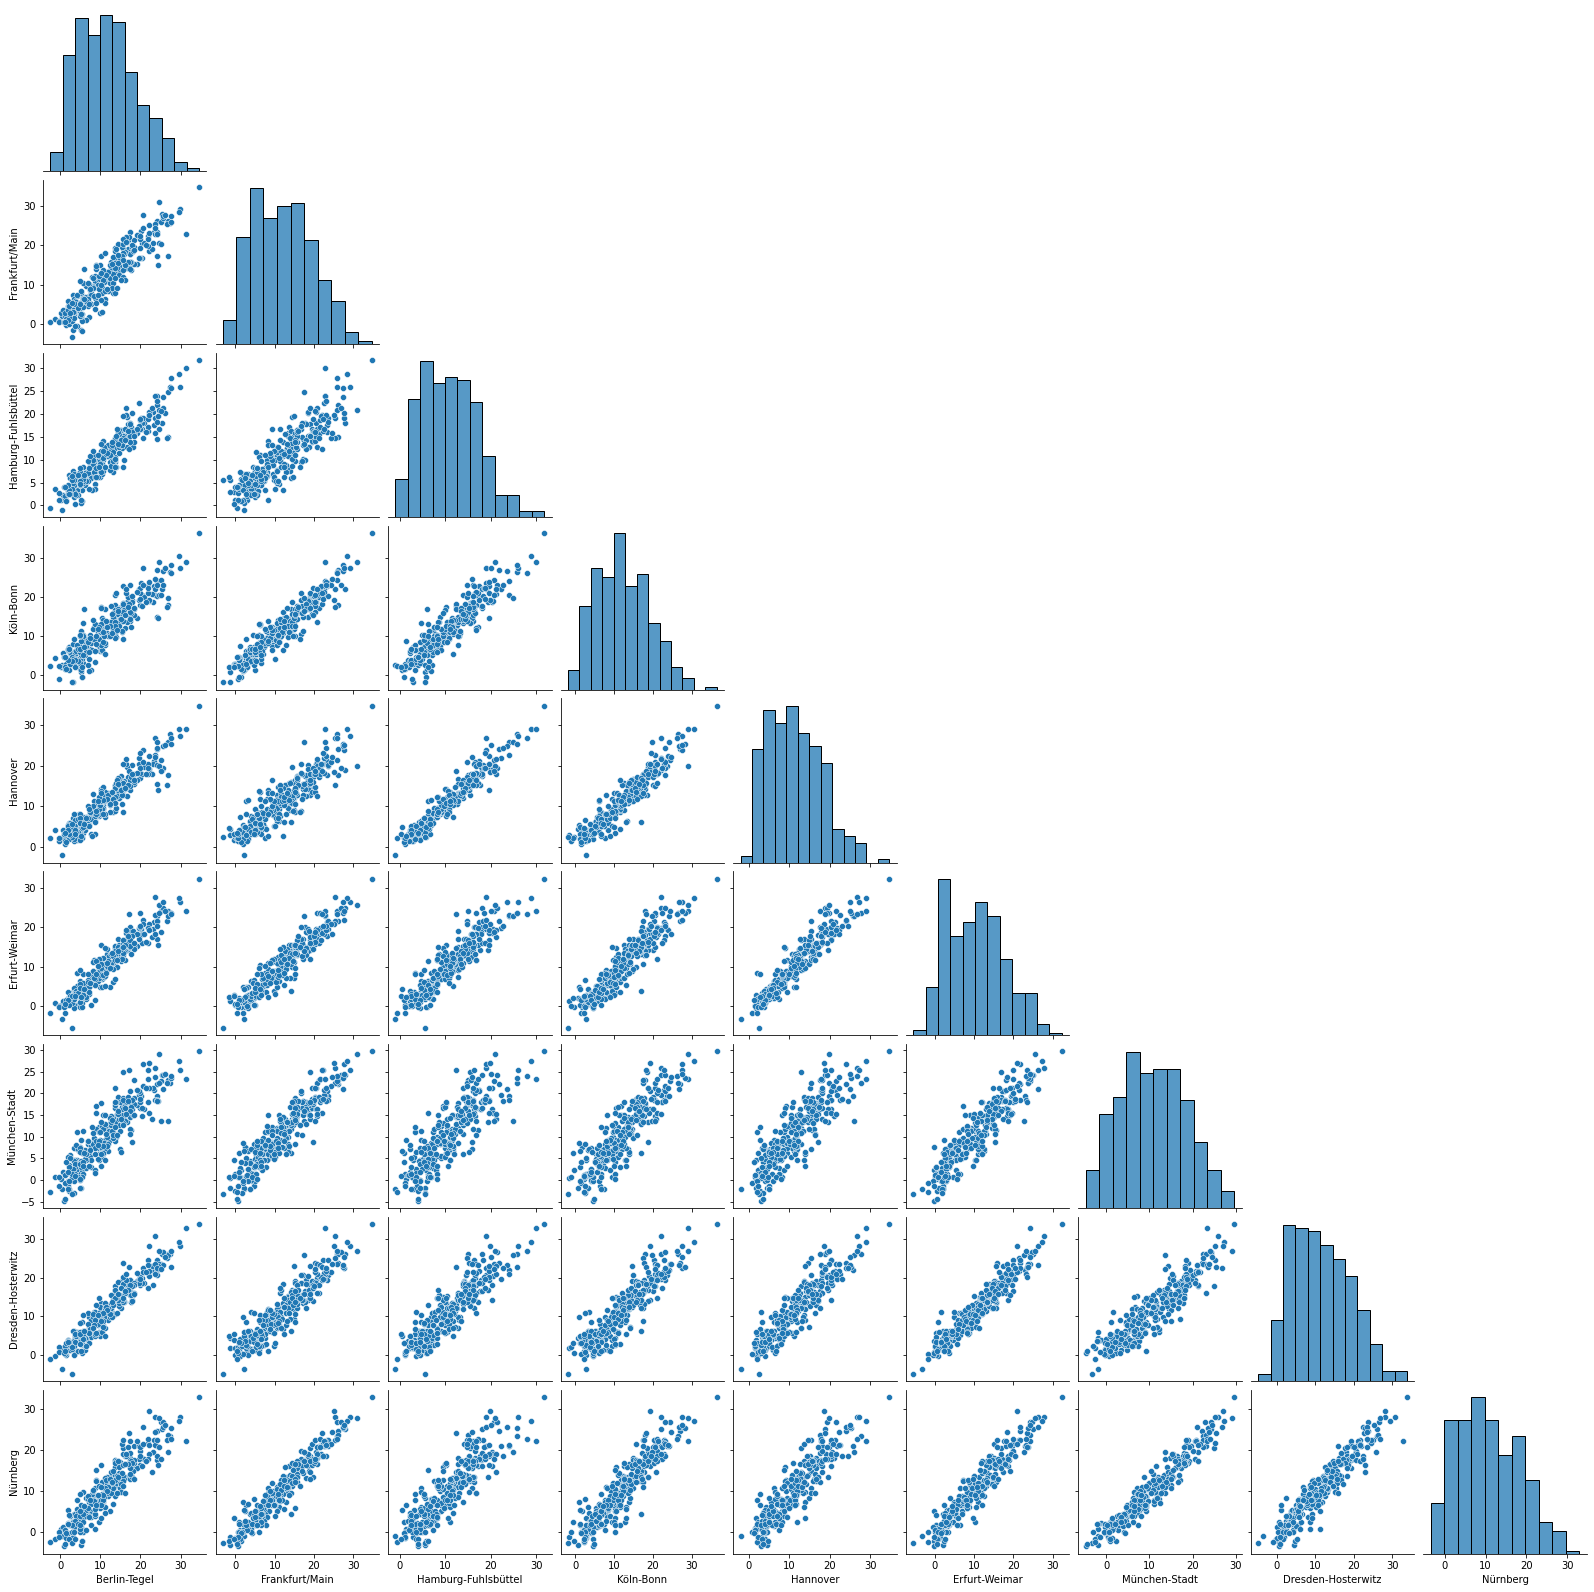

In [18]:
sns.pairplot(temp.iloc[np.random.choice(np.arange(0,len(temp)),300,replace=False),:], corner=True)

#### c) Estimate the mean and covariance matrix of the data (e.g. using numpy). Inspect the values. What do you observe?

In [19]:
# add code here
print(np.mean(temp))
print(np.cov(temp))

Berlin-Tegel           11.519789
Frankfurt/Main         12.102884
Hamburg-Fuhlsbüttel    10.800886
Köln-Bonn              12.023104
Hannover               11.253440
Erfurt-Weimar          10.294936
München-Stadt          10.970720
Dresden-Hosterwitz     11.492212
Nürnberg               10.580540
dtype: float64
[[4.0875     4.81125    4.8875     ... 0.59375    1.11375    1.15875   ]
 [4.81125    6.16694444 6.08777778 ... 0.58666667 1.23805556 1.38972222]
 [4.8875     6.08777778 6.74361111 ... 0.17166667 0.85097222 1.01513889]
 ...
 [0.59375    0.58666667 0.17166667 ... 1.3725     1.43083333 1.33333333]
 [1.11375    1.23805556 0.85097222 ... 1.43083333 1.59444444 1.49027778]
 [1.15875    1.38972222 1.01513889 ... 1.33333333 1.49027778 1.46611111]]


#### d) Use scipy's multivariate normal class to draw 100 samples from a distribution with the estimated parameters.

In [20]:
# add code here
mvn.rvs(mean= np.mean(temp),cov =temp.cov(),size= 100)

LinAlgError: SVD did not converge

#### e)  Do you think the multivariate normal assumption for the temperature data is justified? Can you think of (energy related) problems where the assumption of multivariate normality would not make sense?

Now open the notebook ``Exercise_07_PCA``.